<a href="https://colab.research.google.com/github/Reniindriyani135/Projek-Data-Mining/blob/main/Projek_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [ ]:
# Baca data
df = pd.read_excel("Data ekspor impor.xlsx")
cols = ['Nilai Ekspor (USD)', 'Berat Ekspor (Kg)', 'Nilai Impor (USD)', 'Berat Impor (Kg)']
df[cols] = df[cols].replace(0, np.nan).fillna(df[cols].mean())

In [ ]:
# Normalisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[cols])

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(data_scaled)

# Cetak centroid
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df[cols].columns)
print(centroids)

   Nilai Ekspor (USD)  Berat Ekspor (Kg)  Nilai Impor (USD)  Berat Impor (Kg)
0           -0.223574          -0.110402          -0.207540         -0.106571
1            6.542132           9.812163           6.475179          8.876711
2            2.300516           0.039070           2.068499          0.136883


In [ ]:
# Cetak centroid awal
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df[cols].columns)
print(centroids)

   Nilai Ekspor (USD)  Berat Ekspor (Kg)  Nilai Impor (USD)  Berat Impor (Kg)
0           -0.223574          -0.110402          -0.207540         -0.106571
1            6.542132           9.812163           6.475179          8.876711
2            2.300516           0.039070           2.068499          0.136883


In [ ]:
# Jarak minimum ke centroid
from sklearn.metrics import pairwise_distances_argmin_min
closest, distances = pairwise_distances_argmin_min(data_scaled, kmeans.cluster_centers_)

df_result = pd.DataFrame({
    'Komoditas': df['Kode HS dan Deskripsi'],
    'Cluster': closest,
    'Jarak Minimum ke Centroid': distances
})
print(df_result.sort_values(by='Cluster').to_string(index=False))

                                                         Komoditas  Cluster  Jarak Minimum ke Centroid
                                               [01] Binatang hidup        0                   0.251471
                                                 [02] Daging hewan        0                   0.277106
                                 [03] Ikan, krustasea, dan moluska        0                   0.483753
                                     [04] Susu, mentega, dan telur        0                   0.165447
                                                [05] Produk hewani        0                   0.293659
                                 [06] Pohon hidup dan bunga potong        0                   0.307707
                                                      [07] Sayuran        0                   0.261820
                                                  [08] Buah-buahan        0                   0.099735
                                 [09] Kopi, teh, dan rempah-rempah       

In [ ]:
# Jarak minimum ke centroid
closest, distances = pairwise_distances_argmin_min(data_scaled, kmeans.cluster_centers_)

In [ ]:
# Normalisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[cols])

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(data_scaled)
centroids = kmeans.cluster_centers_

In [ ]:
# Euclidean & Manhattan distance
eu_dist = pairwise_distances(data_scaled, centroids, metric='euclidean')
man_dist = pairwise_distances(data_scaled, centroids, metric='manhattan')

In [ ]:
# Buat tabel 3 (Jarak Euclidean)
eu_df = pd.DataFrame(eu_dist, columns=['Cluster1', 'Cluster2', 'Cluster3'])
eu_df['Jarak Minimal'] = eu_df.min(axis=1)
eu_df['Kluster'] = eu_df[['Cluster1', 'Cluster2', 'Cluster3']].idxmin(axis=1)
eu_df.insert(0, 'Komoditas', df['Kode HS dan Deskripsi'])
print("=== Tabel 3: Euclidean Distance ===")
print(eu_df.head(15))

=== Tabel 3: Euclidean Distance ===
                               Komoditas  Cluster1   Cluster2  Cluster3  \
0                    [01] Binatang hidup  0.251471  16.623441  3.623965   
1                      [02] Daging hewan  0.277106  16.647619  3.655231   
2      [03] Ikan, krustasea, dan moluska  0.483753  16.386683  3.219438   
3          [04] Susu, mentega, dan telur  0.165447  16.491295  3.437464   
4                     [05] Produk hewani  0.293659  16.660274  3.674231   
5      [06] Pohon hidup dan bunga potong  0.307707  16.671622  3.686263   
6                           [07] Sayuran  0.261820  16.633703  3.646303   
7                       [08] Buah-buahan  0.099735  16.417912  3.356752   
8      [09] Kopi, teh, dan rempah-rempah  0.373855  16.418657  3.272937   
9                          [10] Serealia  1.552314  15.549702  3.442079   
10               [11] Hasil penggilingan  0.223928  16.588383  3.627799   
11  [12] Biji dan buah mengandung minyak  0.318285  16.291620  3

In [ ]:
# Buat tabel 4 (Jarak Manhattan)
man_df = pd.DataFrame(man_dist, columns=['Cluster1', 'Cluster2', 'Cluster3'])
man_df['Jarak Minimal'] = man_df.min(axis=1)
man_df['Kluster'] = man_df[['Cluster1', 'Cluster2', 'Cluster3']].idxmin(axis=1)
man_df.insert(0, 'Komoditas', df['Kode HS dan Deskripsi'])
print("\n=== Tabel 4: Manhattan Distance ===")
print(man_df.head(15))


=== Tabel 4: Manhattan Distance ===
                               Komoditas  Cluster1   Cluster2  Cluster3  \
0                    [01] Binatang hidup  0.439764  32.794038  5.632820   
1                      [02] Daging hewan  0.495598  32.849872  5.688655   
2      [03] Ikan, krustasea, dan moluska  0.731718  32.209030  5.047812   
3          [04] Susu, mentega, dan telur  0.303444  32.484847  5.323629   
4                     [05] Produk hewani  0.525965  32.880239  5.719021   
5      [06] Pohon hidup dan bunga potong  0.550708  32.904982  5.743764   
6                           [07] Sayuran  0.468128  32.822401  5.661184   
7                       [08] Buah-buahan  0.177547  32.331247  5.170029   
8      [09] Kopi, teh, dan rempah-rempah  0.590880  32.292991  5.131773   
9                          [10] Serealia  2.184942  30.579807  5.822868   
10               [11] Hasil penggilingan  0.380775  32.735049  5.573832   
11  [12] Biji dan buah mengandung minyak  0.546773  32.109492  

In [ ]:
# Buat tabel 5 (Hasil clustering akhir)
cluster_map = {i: nama for i, nama in zip(np.argsort(centroids[:, 0]), ['Rendah', 'Sedang', 'Tinggi'])}
df['Cluster'] = kmeans.labels_
df['Kategori'] = df['Cluster'].map(cluster_map)
final_df = df[['Kode HS dan Deskripsi', 'Cluster', 'Kategori']]
print("\n=== Tabel 5: Hasil Cluster Akhir ===")
print(final_df.head(15))


=== Tabel 5: Hasil Cluster Akhir ===
                   Kode HS dan Deskripsi  Cluster Kategori
0                    [01] Binatang hidup        0   Rendah
1                      [02] Daging hewan        0   Rendah
2      [03] Ikan, krustasea, dan moluska        0   Rendah
3          [04] Susu, mentega, dan telur        0   Rendah
4                     [05] Produk hewani        0   Rendah
5      [06] Pohon hidup dan bunga potong        0   Rendah
6                           [07] Sayuran        0   Rendah
7                       [08] Buah-buahan        0   Rendah
8      [09] Kopi, teh, dan rempah-rempah        0   Rendah
9                          [10] Serealia        0   Rendah
10               [11] Hasil penggilingan        0   Rendah
11  [12] Biji dan buah mengandung minyak        0   Rendah
12            [13] Lak, getah, dan damar        0   Rendah
13             [14] Bahan anyaman nabati        0   Rendah
14   [15] Lemak dan minyak hewani/nabati        2   Sedang


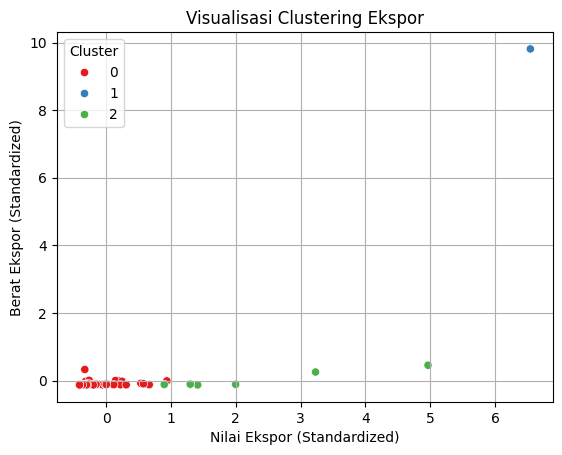

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi 2D hasil clustering
sns.scatterplot(
    x=data_scaled[:, 0],  # Nilai Ekspor
    y=data_scaled[:, 1],  # Berat Ekspor
    hue=kmeans.labels_,
    palette='Set1'
)
plt.title('Visualisasi Clustering Ekspor')
plt.xlabel('Nilai Ekspor (Standardized)')
plt.ylabel('Berat Ekspor (Standardized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Normalisasi Z-score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Baca file Excel
df = pd.read_excel("Data ekspor impor.xlsx")

In [ ]:
# 2. Kolom numerik
kolom_numerik = ['Nilai Ekspor (USD)', 'Berat Ekspor (Kg)', 'Nilai Impor (USD)', 'Berat Impor (Kg)']

In [ ]:
# 3. Bersihkan data: ganti 0 jadi NaN, lalu isi dengan rata-rata
df[kolom_numerik] = df[kolom_numerik].replace(0, np.nan)
df[kolom_numerik] = df[kolom_numerik].fillna(df[kolom_numerik].mean())

In [ ]:
# 4. Normalisasi Z-Score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[kolom_numerik])

In [ ]:
# 5. Buat DataFrame hasil normalisasi
df_zscore = pd.DataFrame(data_scaled, columns=[
    'Nilai Ekspor (Z)', 'Berat Ekspor (Z)', 'Nilai Impor (Z)', 'Berat Impor (Z)'
])
df_zscore.insert(0, 'Komoditas', df['Kode HS dan Deskripsi'])

In [ ]:
# 6. Tampilkan 10 baris pertama hasil normalisasi
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
print(df_zscore.head(10))

                           Komoditas  Nilai Ekspor (Z)  Berat Ekspor (Z)  \
0                [01] Binatang hidup             -0.41             -0.13   
1                  [02] Daging hewan             -0.41             -0.13   
2  [03] Ikan, krustasea, dan moluska              0.21             -0.11   
3      [04] Susu, mentega, dan telur             -0.32             -0.13   
4                 [05] Produk hewani             -0.40             -0.13   
5  [06] Pohon hidup dan bunga potong             -0.41             -0.13   
6                       [07] Sayuran             -0.40             -0.13   
7                   [08] Buah-buahan             -0.19             -0.10   
8  [09] Kopi, teh, dan rempah-rempah              0.10             -0.12   
9                      [10] Serealia             -0.41             -0.13   

   Nilai Impor (Z)  Berat Impor (Z)  
0            -0.30            -0.25  
1            -0.35            -0.26  
2            -0.35            -0.26  
3          

In [ ]:
from google.colab import files
import pandas as pd

# Save the DataFrame to an Excel file
df_zscore.to_excel("Normalisasi_Zscore.xlsx", index=False)

# Download the file
files.download("Normalisasi_Zscore.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>